<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/energy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ファイル読み込み

In [11]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

            Step    Time      Temp     TotEng     Press
0              0       0  1.000000  382.50000  0.009961
1          10000      50  0.991227  359.72828  0.009841
2          20000     100  0.953775  339.68151  0.009253
3          30000     150  1.013107  358.55512  0.008881
4          40000     200  0.979899  355.63221  0.009010
...          ...     ...       ...        ...       ...
9996    99960000  499800  0.993659  357.08218  0.008712
9997    99970000  499850  0.930970  334.85127  0.009118
9998    99980000  499900  0.957462  341.69896  0.009689
9999    99990000  499950  0.912708  328.26944  0.008829
10000  100000000  500000  0.929477  333.72442  0.008675

[10001 rows x 5 columns]


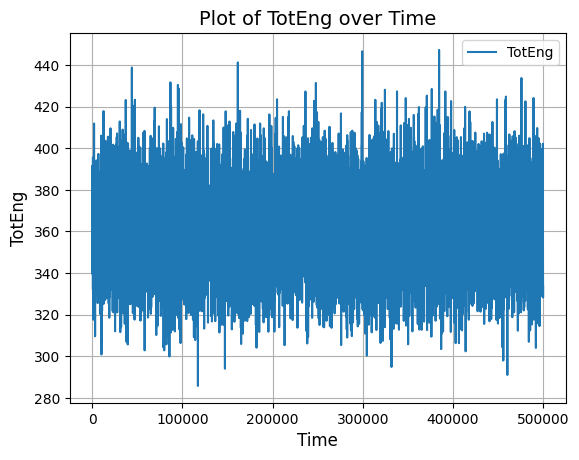

In [12]:
# ファイルを読み込む
path = '/content/drive/MyDrive/Colab Notebooks/data_analysis/press64.txt'
data = pd.read_table(path, sep='\s+')
quantity_name = 'TotEng'

# 設定の入力
thermo = 10000
t_step = 0.005


# データを出力する
print(data)

# データをプロットする
data.plot(x='Time', y=quantity_name)

plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()

# 初期データ及び緩和時間以前に関するデータ加工

            Step    Time      Temp     TotEng     Press
10        100000     500  1.000457  364.04970  0.010552
11        110000     550  0.987429  352.03006  0.009017
12        120000     600  1.011703  366.52026  0.010403
13        130000     650  1.032323  374.14252  0.010064
14        140000     700  1.061115  380.56934  0.009479
...          ...     ...       ...        ...       ...
9996    99960000  499800  0.993659  357.08218  0.008712
9997    99970000  499850  0.930970  334.85127  0.009118
9998    99980000  499900  0.957462  341.69896  0.009689
9999    99990000  499950  0.912708  328.26944  0.008829
10000  100000000  500000  0.929477  333.72442  0.008675

[9991 rows x 5 columns]


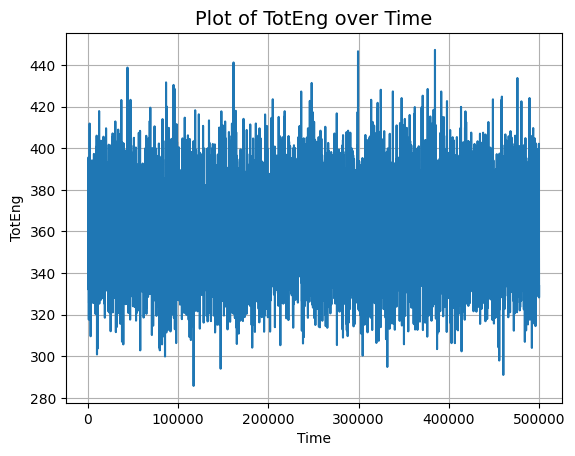

In [13]:
# データ加工
start = 0
end = 9
data = data.drop(range(start,end+1))
print(data)

# データを再格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel(quantity_name)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()

# 確率密度関数

Mean: 360.58
Median: 360.31
Standard deviation: 20.09
Minimum value: 285.78
Maximum value: 447.21
Interquartile range: 26.43


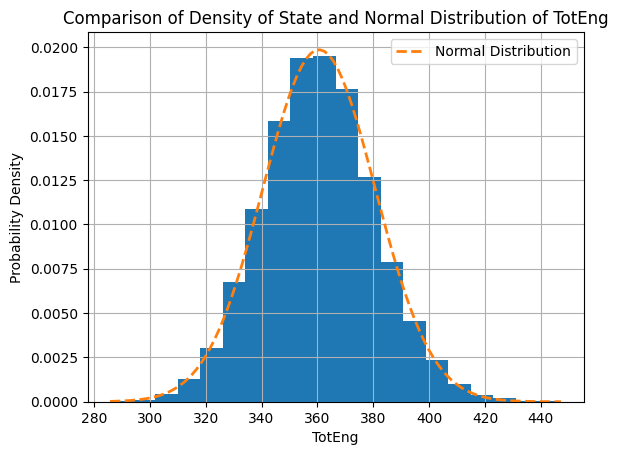

In [14]:

# データ生成
quantity = data[quantity_name] # t倍の緩和時間以前を捨てた物理量データ

# # ヒストグラムを作成
# plt.hist(quantity, bins=20, density=True, alpha=0.5, label='Density of State')

# 統計情報の表示
print(f"Mean: {np.mean(quantity):.2f}")
print(f"Median: {np.median(quantity):.2f}")
print(f"Standard deviation: {np.std(quantity):.2f}")
print(f"Minimum value: {np.min(quantity):.2f}")
print(f"Maximum value: {np.max(quantity):.2f}")
q1, q3 = np.percentile(quantity, [25, 75])
print(f"Interquartile range: {q3 - q1:.2f}")

# ヒストグラムの作成
n, bins, patches = plt.hist(quantity, bins=20, density=True)


# 平均値と標準偏差を求める
mu, sigma = quantity.mean(), quantity.std()

# 正規分布の確率密度関数を作成
x = np.linspace(quantity.min(), quantity.max(), 100)
y = norm.pdf(x, mu, sigma)

# 正規分布の確率密度関数をプロット
plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')

# グラフを整形
plt.xlabel(quantity_name)
plt.ylabel('Probability Density')
plt.title('Comparison of Density of State and Normal Distribution of ' + quantity_name)
plt.legend()

plt.grid()

# グラフを表示
plt.show()


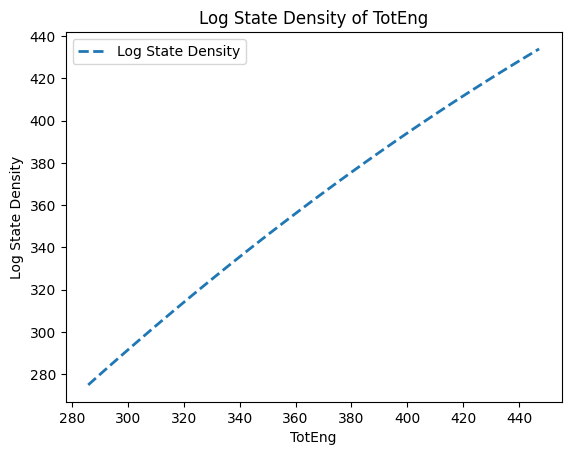

In [15]:

# 確率密度関数を対数に写す
log_y = np.log(y)

# 設定の入力
beta = 1

# 関数
log_dos = log_y + beta * x

# 正規分布の確率密度関数をプロット
plt.plot(x, log_dos, '--', linewidth=2, label='Log State Density')

# グラフを整形
plt.xlabel(quantity_name)
plt.ylabel('Log State Density')
plt.title('Log State Density of ' + quantity_name)
plt.legend()

# グラフを表示
plt.show()
